<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b>Hadamard Operator</b></font>
<br>
_prepared by Abdullah Al Omar Galib_
<br>

An example quantum operator for quantum coin-flipping is Hadamard. 

It is defined as h-gate in Pytket.

We implement all three experiments by using Pytket. Here we present the first and third experiment. The second experiment will be presented later.

_This will be a warm-up step before introducing a quantum bit more formally._  

<h3> The first experiment</h3>

Our quantum bit (<b>qubit</b>) starts in state 0, which is shown as $ \ket{0} = \myvector{1 \\ 0} $.

<i>$ \ket{\cdot} $ is called ket-notation:  Ket-notation is used to represent a column vector in quantum mechanics. 
For a given column vector $ \ket{v} $, its conjugate transpose is a row vector represented as $ \bra{v} $ (bra-notation). 
</i>

<h4> The circuit with a single Hadamard </h4>

We design a circuit with one qubit and apply quantum coin-flipping once.

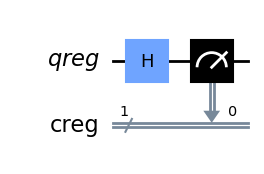

In [6]:
# import all necessary objects and methods for quantum circuits
from pytket.circuit import Circuit, Qubit, Bit
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import tk_to_qiskit

# Create a circuit with one qubit and one classical bit
circ = Circuit()
circ.add_q_register("qreg", 1)
circ.add_c_register("creg", 1)

# Apply a Hadamard gate to the first qubit in the "qreg" register
circ.H(Qubit("qreg", 0))

# Measure the first qubit and write the output to the first classical bit
circ.Measure(Qubit("qreg", 0), Bit("creg", 0))

# Let's draw our circuit now 
render_circuit_jupyter(circ) # Render interactive circuit diagram
cr = tk_to_qiskit(circ) # Convert to qiskit circuit
cr.draw(output='mpl') # Draw qiskit circuit


<img src="../photon/images/photon1.jpg" width="40%">

Counter({(1,): 5056, (0,): 4944})

State 0 is observed with frequency % 49.44
State 1 is observed with frequency % 50.56



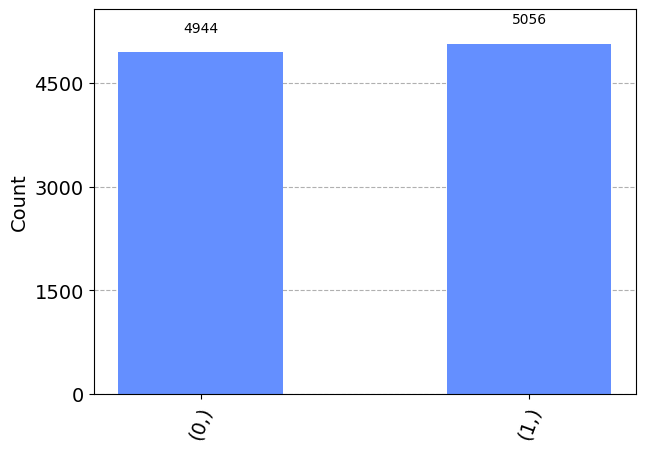

In [8]:
# execute the circuit 10000 times in the local simulator
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()
compiled_circ = backend.get_compiled_circuit(circ)
handle = backend.process_circuit(compiled_circ, n_shots=10000)
counts = backend.get_result(handle).get_counts()
print(counts) 

print()
if (0,) in counts:
    n_zeros = counts[(0,)]
else:
    n_zeros = 0
if (1,) in counts:
    n_ones = counts[(1,)]
else:
    n_ones = 0
if n_zeros + n_ones > 0:
    print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
    print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The numbers of outcomes '0's and '1's are expected to be close to each other.

<img src="../photon/images/photon2.jpg" width="40%" align="left">

<b style="color:black;"> As we have observed after this implementation, quantum systems output probabilistically.</b>

<h3> The third experiment </h3>

_We will examine the second experiment later because it requires intermediate measurement. (We can do intermediate measurements in simulators, but it is not possible in the real machines.)_

Now, we implement the third experiment.

<img src="../photon/images/photon6.jpg" width="60%" align="left">

<h4> The circuit with two Hadamards </h4>

We design a circuit with one qubit and apply quantum coin-flipping twice.

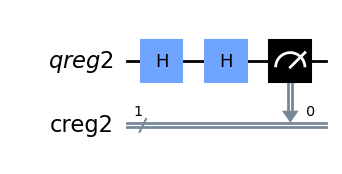

In [9]:
from pytket.circuit import Circuit, Qubit, Bit
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import tk_to_qiskit

# Create a circuit with one qubit and one classical bit
qc = Circuit()
qc.add_q_register("qreg2", 1)
qc.add_c_register("creg2", 1)

# Apply two Hadamard gates to the first qubit in the "qreg2" register
qc.H(Qubit("qreg2", 0))
qc.H(Qubit("qreg2", 0))

# Measure the first qubit and write the output to the first classical bit
qc.Measure(Qubit("qreg2", 0), Bit("creg2", 0))

# Let's draw our circuit now 
render_circuit_jupyter(qc) # Render interactive circuit diagram
cr1 = tk_to_qiskit(qc) # Convert to qiskit circuit
cr1.draw(output='mpl') # Draw qiskit circuit

In [4]:
# execute the circuit 10000 times in the local simulator

from pytket.extensions.qiskit import AerBackend
backend = AerBackend()
compiled_qc = backend.get_compiled_circuit(qc)
handle1 = backend.process_circuit(compiled_qc, n_shots=10000)
counts1 = backend.get_result(handle1).get_counts()
print(counts1) 

Counter({(0,): 10000})


The <u>only outcome</u> must be '0'.

<img src="../photon/images/photon7.jpg" width="60%" align="left">

<h3> Task 1 </h3>

Remember that x-gate flips the value of a qubit.

Design a quantum circuit with a single qubit.

The qubit is initially set to $ \ket{0} $.

Set the value of qubit to $ \ket{1} $ by using x-gate.

Experiment 1: Apply one Hadamard gate, make measurement, and execute your program 10000 times.

Experiment 2: Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

The following two diagrams represent these experiments.

<table>
    <tr>
        <td><img src="../photon/images/photon8.jpg" width="80%"></td>
        <td><img src="../photon/images/photon9.jpg" width="70%"></td>
    </tr>
</table>

In [5]:
#
# your solution is here
#


<a href="Q20_Hadamard_Solution.ipynb">click for our solution</a>